<h1 align='center'><strong>Machine Learning</strong></h1>
<h1 align='center'>Aplicación: Review_score predecido por orden.</h1>

---

<h3 align='center'><u>Introducción:</u></h3>

Para la aplicación Web que nos ayudará a predecir la review_score que tendrá una orden, comenzaremos analizando nuestros datos y armando diferentes clases y objetos de aprendizaje automático que nos ayudaran a la hora de insanciar nuestro modelo de Regresión,puntualmente, utilizaremos un Random Forest para predecir la review_score que tendrá una orden según los features que analizaremos a lo largo de este informe.

---

<h3 align='center'><u>Primeros pasos:</u></h3>

#### ◦ Comenzamos la creación de nuestro modelo importando las librerías y módulos a utilizar.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from workalendar.america import Brazil
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#### ◦ Creo mi dataframe llamado "df_score" con los datos del archivo .csv anteriormente solicitado al área de Engineering y hago un pequeño análisis general de mis datos para corroborar que los mismos estén limpios y completos.

In [64]:
df_score = pd.read_csv("datasets\\ML_table_score_limpio.csv", delimiter = ',', encoding = "utf-8")
df_score = df_score.drop(columns='seller_id')
df_score

,order_status,order_products_value,freight_value,order_item_id,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,review_score
0,delivered,102,19,1,2018-05-20 18:45:21,2018-05-20 18:58:59,2018-06-20 00:00:00,2018-06-06 22:11:56,RS,perfumaria,53.0,596.0,6,5
1,delivered,130,14,1,2017-12-12 19:20:28,2017-12-12 19:32:19,2018-01-05 00:00:00,2017-12-23 17:11:51,SP,automotivo,56.0,752.0,4,4
2,delivered,229,13,1,2017-12-21 16:21:47,2017-12-22 17:31:27,2018-01-16 00:00:00,2018-01-06 15:03:41,SP,cama mesa banho,50.0,266.0,2,1
3,delivered,59,20,1,2018-08-10 13:24:35,2018-08-10 13:35:21,2018-08-27 00:00:00,2018-08-17 21:33:40,RS,utilidades domesticas,25.0,364.0,3,5
4,delivered,59,20,1,2018-08-01 22:00:33,2018-08-01 22:15:19,2018-08-24 00:00:00,2018-08-07 17:38:52,RS,utilidades domesticas,25.0,364.0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108460,delivered,30,18,1,2018-04-01 11:58:04,2018-04-03 05:35:27,2018-04-20 00:00:00,2018-04-20 20:56:36,GO,informatica acessorios,47.0,501.0,5,5
108461,delivered,35,18,1,2018-04-19 10:12:12,2018-04-19 10:34:35,2018-05-15 00:00:00,2018-04-25 17:58:54,MG,informatica acessorios,47.0,501.0,5,5
108462,delivered,35,8,1,2018-08-10 17:15:07,2018-08-10 17:25:18,2018-08-15 00:00:00,2018-08-14 20:50:53,SP,informatica acessorios,47.0,501.0,5,5
108463,delivered,35,7,1,2018-05-01 17:31:41,2018-05-01 17:53:01,2018-05-15 00:00:00,2018-05-03 18:32:48,SP,informatica acessorios,47.0,501.0,5,5


In [70]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108465 entries, 0 to 108464
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   108465 non-null  object 
 1   order_products_value           108465 non-null  int64  
 2   freight_value                  108465 non-null  int64  
 3   order_item_id                  108465 non-null  int64  
 4   order_purchase_timestamp       108465 non-null  object 
 5   order_approved_at              108465 non-null  object 
 6   order_estimated_delivery_date  108465 non-null  object 
 7   order_delivered_customer_date  108465 non-null  object 
 8   customer_state                 108465 non-null  object 
 9   product_category_name          108465 non-null  object 
 10  product_name_lenght            108465 non-null  float64
 11  product_description_lenght     108465 non-null  float64
 12  product_photos_qty            

#### ◦ Aplicamos unas pequeñas transformaciones a nuestras columnas con datos de fecha:

In [15]:
# Convierto mis columnas de fechas a un formato datetime para que el modelo pueda trabajar con estos datos.
df_score['order_purchase_timestamp'] = pd.to_datetime(df_score.order_purchase_timestamp)
df_score['order_approved_at'] = pd.to_datetime(df_score.order_approved_at).dt.date  
df_score['order_estimated_delivery_date'] = pd.to_datetime(df_score.order_estimated_delivery_date).dt.date  
df_score['order_delivered_customer_date'] = pd.to_datetime(df_score.order_delivered_customer_date).dt.date 

#### ◦ Dividimos nuestros datos intentando que mantengan una representación proporcional de nuestra columna objetivo 'review_score'.

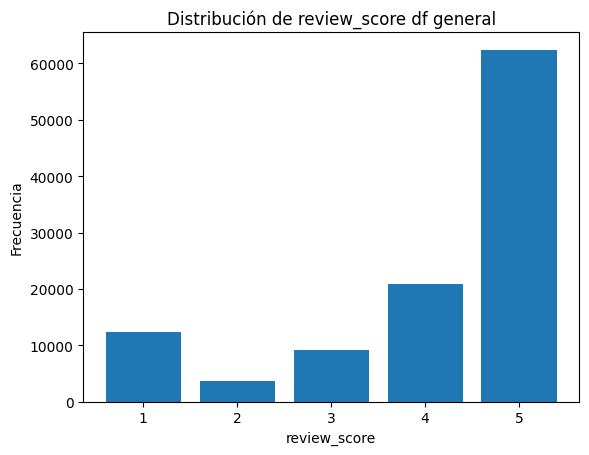

In [16]:
# Calculo la frecuencia de cada clase en el conjunto de datos
class_counts = df_score['review_score'].value_counts()

# Creo un gráfico de barras para mostrar la distribución de mi clase 'review_score'.
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('review_score')
plt.ylabel('Frecuencia')
plt.title('Distribución de review_score df general')
plt.show()

In [17]:
# Realizo un muestreo estratificado de los datos, esto lo hago para que mis dos conjuntos, el de testeo y el de entrenamiento, tengan una representación proporcional de los datos ya que nuestra clase 'review_score' está desequilibrada.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_score, df_score['review_score']):
    strat_train_set = df_score.loc[train_index]
    strat_test_set = df_score.loc[test_index]

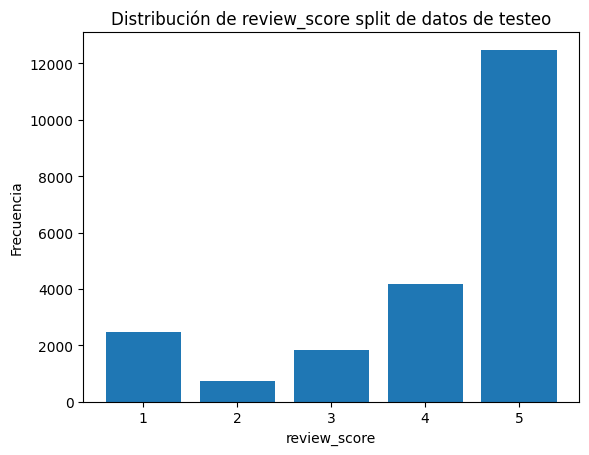

In [18]:
# Calculo la frecuencia de cada clase en el nuevo conjunto de datos de testeo
class_counts = strat_test_set['review_score'].value_counts()

# Creo un gráfico de barras para mostrar la distribución de mi clase 'review_score'
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('review_score')
plt.ylabel('Frecuencia')
plt.title('Distribución de review_score split de datos de testeo')
plt.show()

---

#### ◦ Luego de analizar de manera general nuestros datos y dividirlos de forma estratificada, comenzamos con el análisis de features.

In [19]:
# Separamos las etiquetas de las features/características ya que no queremos aplicar transformaciones a nuestras etiquetas, sino a los datos.
score_features = strat_train_set.drop('review_score', axis=1)
score_labels = strat_train_set['review_score'].copy()

In [20]:
# Verificamos la correlación de nuestros datos con 'review_score'.
corr_matrix = strat_train_set.corr()
corr_matrix['review_score'].sort_values(ascending=False)

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_21240\1980408908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = strat_train_set.corr()


review_score                  1.000000
product_photos_qty            0.022973
product_description_lenght    0.014287
order_products_value          0.004004
product_name_lenght          -0.012336
freight_value                -0.036380
order_item_id                -0.136540
Name: review_score, dtype: float64

#### ◦ Podemos sacar como deducción que para continuar con el modelo necesitamos implementar nuevas features que ayuden a correlacionar más nuestros datos, para ello planteamos agregar las siguientes columnas:

+ Tiempo estimado de entrega en días hábiles: 'tiempo_envio_estimado'
Un comprador puede estar poco satisfecho si el tiempo estimado de entrega es alto.

+ Tiempo real de entrega en días hábiles: 'tiempo_envio_real'
Un comprador puede estar más satisfecho si su producto llega antes de lo esperado.

+ Delta de tiempo de entrega en días hábiles: 'delta_tiempo_envio'
Diferencia entre la fecha estimada y la fecha real del envío, si este valor es negativo la entrega se hizo antes del tiempo estimado, si es positivo, el envío tardó más de lo estimado.

+ Entrega tardía: 'entrega_tardia'
False si el pedido llegó antes de tiempo, True si el pedido se atrasó al tiempo estimado.

+ Precio total del pedido: 'precio_total'
Un comprador puede estar más o menos satisfecho según el precio total de su pedido.

+ Relación precio envio/producto: 'relacion_envio_producto'
Un comprador puede esperar un mejor servicio logístico si el precio del producto es alto.

In [21]:
# Creamos la variable cal utilizando la librería workalendar.america para extraer los días hábiles en Brasil y en base a eso calcular los tiempos de envío.
cal = Brazil()

#### ◦ Para asegurarnos de que todos los datos que analicemos sufran las mismas transformaciones, definimos una clase con la ayuda de los módulos BaseEstimator y TransformerMixin de scikit learn.

La clase 'NewFeatures()' hereda de las clases BaseEstimator y TransformerMixin de scikit-learn. Esta clase define un modelo que se utiliza para añadir nuevas características o atributos a un conjunto de datos.

Los métodos fit() y transform() son los métodos clave de esta clase. El método fit() se utiliza para ajustar el objeto de aprendizaje automático a los datos de entrada, mientras que el método transform() se utiliza para aplicar la transformación a los datos de entrada y devolver el conjunto de datos transformado. En este caso, el método transform() hace lo siguiente:

+ Crea una copia del conjunto de datos de entrada (X) y lo almacena en una variable llamada "df"
+ Calcula el tiempo estimado y real del envío en días hábiles para desestimar feriados y fines de semana que no influyen en la entrega.
+ Crea una nueva columna "delta_tiempo_envio" que es la diferencia entre el tiempo estimado y el tiempo real de envío.
+ Crea una nueva columna "entrega_tardía" que indica si la entrega fue tardía o no.
+ Calcula el precio total de la orden
+ Calcula la relación entre precio logística con precio del producto
+ Remueve las columnas con formato fecha del conjunto de datos
+ Devuelve el conjunto de datos transformado

Como resumen, la clase 'NewFeatures()' se utiliza para añadir nuevas características al conjunto de datos, aumentando la cantidad de información disponible para el modelo y buscando mejorar la precisión del mismo más adelante.

In [26]:
class NewFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        
        # Calculo el tiempo estimado y real del envío en días hábiles para desestimar feriados y fines de semana que no influyen en la entrega.
        df['tiempo_envio_estimado'] = df.apply(lambda x: cal.get_working_days_delta(x.order_approved_at, 
                                                                                      x.order_estimated_delivery_date), axis=1)
        df['tiempo_envio_real'] = df.apply(lambda x: cal.get_working_days_delta(x.order_approved_at, 
                                                                                   x.order_delivered_customer_date), axis=1)
        df['delta_tiempo_envio'] = df.tiempo_envio_real - df.tiempo_envio_estimado
        df['entrega_tardia'] = df.order_delivered_customer_date > df.order_estimated_delivery_date

        # Calculo el precio total de la orden
        df['precio_total'] = df.order_products_value + df.freight_value
        
        # Calculo la relacion precio logística con precio del producto
        df['relacion_envio_producto'] = df.freight_value / df.order_products_value
                       
        # Remuevo las columnas con formato fecha de mi dataset
        cols2drop = ['order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date', 
                     'order_delivered_customer_date']
        df.drop(cols2drop, axis=1, inplace=True)

        return df
        

In [27]:
# Aplico la clase NewFeatures() y le paso la muestra estratificada de datos de entrenamiento.
new_ft = NewFeatures()
feat_eng = new_ft.transform(strat_train_set)
feat_eng.head(3)

,order_status,order_products_value,freight_value,order_item_id,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,review_score,tiempo_envio_estimado,tiempo_envio_real,delta_tiempo_envio,entrega_tardia,precio_total,relacion_envio_producto
69425,delivered,189,21,2,RJ,informatica acessorios,44.0,273.0,1,1,24,7,-17,False,210,0.111111
16369,delivered,49,18,1,PR,relogios presentes,60.0,539.0,9,5,8,3,-5,False,67,0.367347
88028,delivered,40,9,1,PR,moveis decoracao,56.0,262.0,1,5,8,1,-7,False,49,0.225000


#### ◦ Verificamos la correlación de nuestros datos con 'review_score' ahora que contamos con más features. Seguimos sin encontrar ninguna correlación evidente, pero gracias a la correlación negativa que hay con 'entrega_tardia' podemos notar que si un comprador recibe su producto luego de lo esperado, es probable que puntúe mal el producto.

In [29]:
corr_matrix = feat_eng.corr()
corr_matrix['review_score'].sort_values(ascending=False)

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_21240\3399845013.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = feat_eng.corr()


review_score                  1.000000
product_photos_qty            0.022973
product_description_lenght    0.014287
order_products_value          0.004004
precio_total                  0.000817
product_name_lenght          -0.012336
freight_value                -0.036380
relacion_envio_producto      -0.041405
tiempo_envio_estimado        -0.062558
order_item_id                -0.136540
delta_tiempo_envio           -0.228294
tiempo_envio_real            -0.307319
entrega_tardia               -0.359209
Name: review_score, dtype: float64

In [39]:
# Separo mis datos por variables categóricas y numéricas.
cat_var = ['order_status', 'customer_state', 'product_category_name']
num_var = score_features.drop(cat_var, axis=1).columns

In [46]:
# Creo una clase 'FtSelector()' para seleccionar un subconjunto específico de features de un conjunto de datos, lo que es útil para reducir el tiempo de entrenamiento y mejorar la precisión del modelo al trabajar con un conjunto de características más pequeño y relevante.
class FtSelector(BaseEstimator, TransformerMixin):
    def __init__(self, var_names):
        self.var_names = var_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.var_names]

---

<h3 align='center'><u>Pipeline:</u></h3>

Creo un objeto Pipeline con la ayuda de scikit-learn para indicar una serie de pasos de procesamiento de datos que se deben ejecutar en orden. Cada paso en el pipeline se especifica como un par nombre-objeto, donde el nombre es un identificador único para el paso y el objeto es el objeto de aprendizaje automático o clase personalizada que se utiliza para realizar el paso.

En este caso, el pipeline num_pipeline tiene tres pasos:

+ selector: Este paso utiliza la clase FtSelector para seleccionar un subconjunto de características numéricas del conjunto de datos.
+ new_features: Este paso utiliza la clase NewFeatures para agregar nuevas características al conjunto de datos.
+ std_scaller: Este paso utiliza la clase StandardScaler para normalizar las características numéricas, esto es escalar cada característica para tener una media de cero y una desviación estándar de uno.

El resultado final es un conjunto de datos transformado que se utilizará para entrenar o evaluar un modelo de aprendizaje automático.

In [47]:
# Creo mi objeto Pipeline y le indico los pasos que debe cumplir.
num_pipeline = Pipeline([('selector', FtSelector(num_var)),
                         ('new_features', NewFeatures()),
                         ('std_scaller', StandardScaler())
                        ])

In [65]:
# Ingestamos nuestro 'score_features' en el pipeline para que sufra las transformaciones necesarias para ser analizado por nuestro modelo.
score_features_transformed = num_pipeline.fit_transform(score_features)
score_features_transformed

array([[ 0.3764499 ,  0.0622035 ,  1.1553757 , ..., -0.26295886,
         0.3675509 , -0.59946258],
       [-0.39014862, -0.12718988, -0.28321949, ..., -0.26295886,
        -0.38616243,  0.1351233 ],
       [-0.43942996, -0.69537001, -0.28321949, ..., -0.26295886,
        -0.48103544, -0.27296191],
       ...,
       [-0.47228418, -0.37971438, -0.28321949, ..., -0.26295886,
        -0.48630616,  0.26246172],
       [-0.32991588, -0.25345213, -0.28321949, ...,  3.8028762 ,
        -0.33872593, -0.15351044],
       [-0.60917677, -0.31658326, -0.28321949, ..., -0.26295886,
        -0.6128035 ,  3.86005878]])

---

<h3 align='center'><u>Modelo de regresión: Random Forest</u></h3>

#### ◦ Utilizaremos un modelo de Regresión Random Forest para intentar predecir el review_score que obtendrá una orden basandonos en el conjunto de features que analizamos a lo largo del informe. la lógica detrás de este modelo es construir varios árboles de decisión y combinarlos para obtener una mejor precisión en la predicción. Cada árbol de decisión se construye a partir de un subconjunto aleatorio de características y un subconjunto aleatorio de muestras de entrenamiento. Al combinar varios árboles de decisión, se obtiene una mejor precisión debido a que los errores individuales de cada árbol se promedian y se reduce la varianza en las predicciones.

In [66]:
# Creo una instancia del modelo RandomForestRegressor.
forest_reg = RandomForestRegressor()

# Selecciono los datos que utilizaré para el modelo.
X = score_features_transformed
y = score_labels

# Ajusto el modelo con los datos.
forest_reg.fit(X, y)

RandomForestRegressor()

In [71]:
# Calculamos el mean_squared_error o error cuadrático medio para verificar la eficacia del modelo.
predictions = forest_reg.predict(score_features_transformed)
forest_mse = mean_squared_error(score_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.46958099668332404

---

#### ◦ Ponemos a prueba el modelo:

In [77]:
test_data = score_features.iloc[:20]
test_labels = score_labels.iloc[:20]
test_data_transformed = num_pipeline.transform(test_data)

In [78]:
print('Predicción: {} \nReal: {}'.format(list(forest_reg.predict(test_data_transformed)), list(test_labels.values)))

Predicción: [1.61, 4.64, 4.74, 4.02, 4.19, 4.71, 1.6933333333333331, 4.8425, 4.145, 4.1, 4.78, 3.96, 2.59, 2.07, 3.45, 4.89, 4.21, 4.9383333333333335, 3.97, 4.77] 
Real: [1, 5, 5, 4, 4, 5, 1, 5, 4, 4, 5, 4, 1, 2, 3, 5, 4, 5, 4, 5]
